# Electric Grid Stability

Stability of the Grid System
Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy source, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.

Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

It has 12 primary predictive features and two dependent variables.

Predictive features:

'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
Dependent variables:

'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
'stabf': a categorical (binary) label ('stable' or 'unstable').

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
data = pd.read_csv("/Users/user/Documents/Data Science/Hamoye/Classification Data/Data_for_UCI_named.csv")
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [25]:
data.drop(["stab"], axis = 1, inplace = True)

In [26]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


In [28]:
x = data.iloc[:,:-1]
y = data["stabf"]

In [29]:
x.shape


(10000, 12)

In [30]:
y.shape

(10000,)

In [90]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [91]:
vals = {"unstable" : 0, "stable" : 1}
y_train = y_train.replace(vals)

In [92]:
y_train.value_counts()

0    5092
1    2908
Name: stabf, dtype: int64

In [93]:
vals = {"unstable" : 0, "stable" : 1}
y_test = y_test.replace(vals)

In [94]:
y_test.value_counts()

0    1288
1     712
Name: stabf, dtype: int64

Notice an imbalance in the number of stable and unstable values in the train data set. I'll use SMOTE to correct this

In [64]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [65]:
y_balanced.value_counts() #fixed

unstable    5092
stable      5092
Name: stabf, dtype: int64

In [34]:
#Standard Scaler to transform data
from sklearn.preprocessing import StandardScaler

In [21]:
y_train = y_train.values.reshape(-1, 1)

In [36]:
y_train.shape

(8000,)

In [95]:
stc = StandardScaler()
x_train = stc.fit_transform(x_train)
x_test = stc.transform(x_test)
#y_train = stc.transform(y_train)

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [42]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9245


In [45]:
# Feature importance
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

tau2    0.126264
tau1    0.123884
tau4    0.122325
tau3    0.120940
g3      0.099865
g2      0.097921
g4      0.097437
g1      0.093916
p3      0.029860
p2      0.029648
p4      0.029018
p1      0.028924
dtype: float64

No handles with labels found to put in legend.


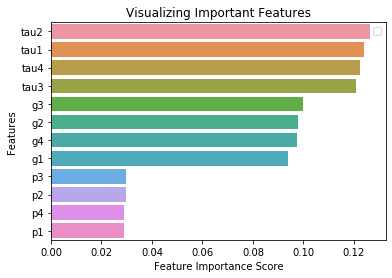

In [46]:
#Visualize Feature Importance
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Hyperparameter SearchCV

In [47]:
y_train.value_counts()

0    5092
1    2908
Name: stabf, dtype: int64

In [48]:
y_test.value_counts()

0    1288
1     712
Name: stabf, dtype: int64

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hp_grid = {'n_estimators': n_estimators,

'min_samples_leaf': min_samples_leaf,

'min_samples_split': min_samples_split,

'max_features': max_features}



In [52]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = hp_grid, n_iter = 20,cv = 5,
                              verbose = 2, random_state=1, n_jobs = -1)

In [53]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, verbose=2)

In [55]:
print( "Random Grid: ", hp_grid, "\n")
print( "Best Parameters: ", rf_random.best_params_, "\n")

Random Grid:  {'n_estimators': [50, 100, 300, 500, 1000], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 3, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2', None]} 

Best Parameters:  {'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': None} 



## ExtraTree Classifier

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
clf = ExtraTreesClassifier(n_estimators=1000, random_state=1, min_samples_split = 3, min_samples_leaf = 4,
                          max_features = None)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred

array([0, 0, 1, ..., 1, 0, 0])

In [58]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 93


In [59]:
#Confusion Matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=pred, labels=[1, 0])
cnf_mat

array([[ 626,   86],
       [  51, 1237]])

In [60]:
#F1-Score
f1 = f1_score(y_true=y_test, y_pred=pred, pos_label=1)
f1

0.9013678905687544

In [64]:
#cross-validation and accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='f1_macro')
scores


array([0.91651282, 0.92222903, 0.91700906, 0.91034096, 0.92985201])

In [65]:
#Leave One Out Cross Validation (LOOCV)
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(clf, x_train, y_train, cv=loo, 
                         scoring='f1_macro')
average_score = scores.mean() * 100
average_score

KeyboardInterrupt: 

And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set.

## XGBoost

In [116]:
conda install -c conda-forge xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/user/opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    conda-4.10.3               |   py37hf985489_2         3.0 MB  conda-forge
    libxgboost-0.90            |       h6de7cb9_1         2.4 MB  conda-forge
    py-xgboost-0.90            |   py37h6de7cb9_1          71 KB  conda-forge
    xgboost-0.90               |   py37h6de7cb9_1           9 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.5 MB

The

In [66]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [67]:
x = data.iloc[:,:-1]
y = data["stabf"]

In [68]:
y.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [69]:
vals = {"unstable" : 0, "stable" : 1}
y_trans = y.replace(vals)
y_trans.value_counts()

0    6380
1    3620
Name: stabf, dtype: int64

In [70]:
y.shape

(10000,)

In [101]:
dmatric = xgb.DMatrix(data=x,label=y_trans)

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_trans, test_size=0.2, random_state=1)

In [103]:
stc = StandardScaler()
X_train = stc.fit_transform(X_train)
X_test = stc.transform(X_test)
#y_train = stc.transform(y_train)

In [104]:
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)

In [105]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [106]:
#root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.269258


In [107]:
#accuracy score
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 92.75%


### Visualization

In [77]:
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=dmatric, num_boost_round=10)


In [147]:
conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/user/opt/anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    certifi-2019.9.11          |           py37_0         151 KB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.10             |       haf1e3a3_0          63 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4               |       h060686c_0         455

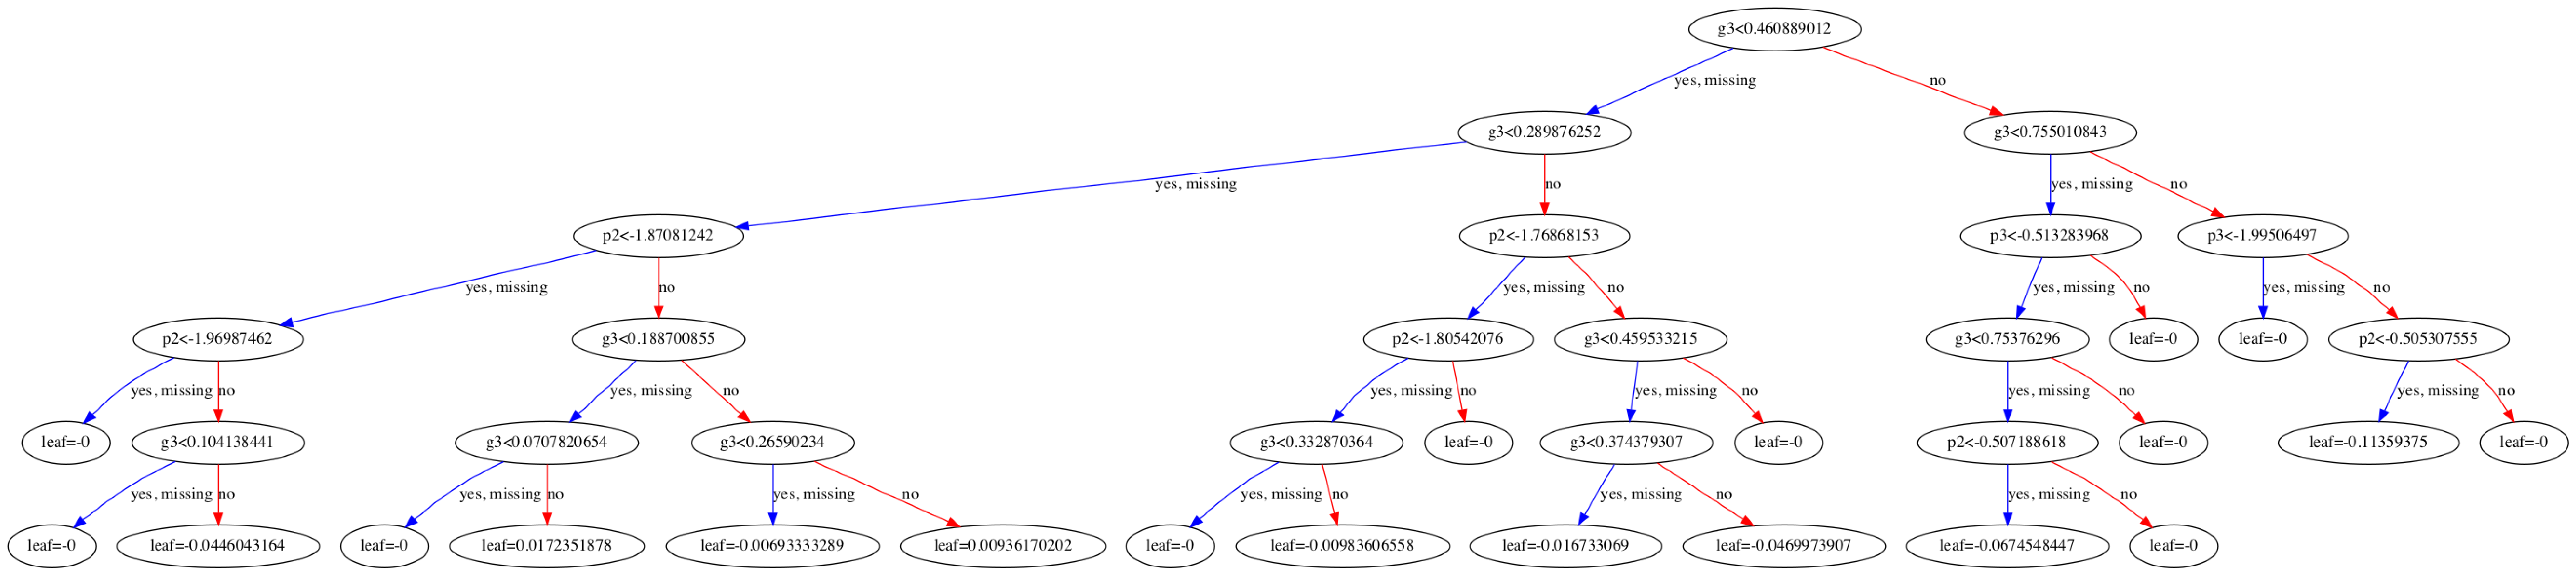

In [79]:
import matplotlib.pyplot as plt
import graphviz

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

## Lightgbm Classifier

In [163]:
conda install -c conda-forge lightgbm

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/user/opt/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    clangdev-4.0.0             |        default_0        62.8 MB  conda-forge
    lightgbm-2.3.0             |   py37h6de7cb9_0         679 KB  conda-forge
    llvmdev-4.0.0              |        default_0       100.9 MB  conda-forge
    openmp-4.0.0               |                1         195 KB  conda-forge
    ------------------------------------------------------------
                                           Total:       164.6 MB

Th

In [96]:
import lightgbm as lgb
clfer = lgb.LGBMClassifier()
clfer.fit(x_train, y_train)

LGBMClassifier()

In [97]:
#predict
y_pred=clf.predict(x_test)

In [99]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9315


In [100]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[1237   51]
 [  86  626]]

True Positives(TP) =  1237

True Negatives(TN) =  626

False Positives(FP) =  51

False Negatives(FN) =  86
